In [5]:
import pandas as pd 
import numpy as np

In [15]:
def check_scores(scores, data):
    n = len(data)
    for i in range(n):
        for j in range(i+1, n):
            s1, (r1, d1) = scores[i], data[i]
            s2, (r2, d2) = scores[j], data[j]
            if s1 < s2 and r1 >= r2 and d1 <= d2 or \
            s2 < s1 and r2 >= r1 and d2 <= d1:
                return i, j
    return "correct"

def loss(score_w, score_l, n):
    score_l = np.array(score_l)
    score_w = np.array(score_w)
    loss = np.sum(np.log(1 + np.exp(score_l - score_w))) / n
    return loss

def load_input():
    fin = open('./restaurants.in')
    n = int(fin.readline().strip())
    data = []
    for line in fin:
        data.append([float(x) for x in line.strip().split()])
    fin.close()
    return np.array(data), data


Training

In [7]:
# load data 
train = pd.read_csv('./restaurants_train.txt', sep='\t', header=None)

In [8]:
# make restaurants.in
unique_samples = set()
for record in train.iterrows():
    features1 = tuple(map(str, [record[1][1], record[1][3]]))
    features2 = tuple(map(str, [record[1][2], record[1][4]]))
    unique_samples.update([features1, features2])

with open('./restaurants.in', 'w') as rest_in:
    rest_in.write(str(len(unique_samples))+'\n')
    for us in unique_samples:
        rest_in.write(' '.join(list(us)) + '\n')

In [9]:
X, data = load_input()

winner = train.values[:, 0]
res_w = train.values[:, [1,3]][winner == 0]
res_w = np.vstack((res_w, train.values[:, [2,4]][winner == 1]))

res_l = train.values[:, [2,4]][winner == 0]
res_l = np.vstack((res_l, train.values[:, [1,3]][winner == 1]))

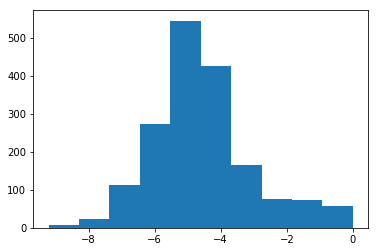

In [10]:
# normalize dist

import matplotlib.pyplot as plt 
%matplotlib inline 
plt.hist(np.log(X[:, 1]+0.0001));

In [11]:
def predict(data, w1=0.1, w2=1):
    X = data.copy()
    # no standardization needed 
    ratings = X[:, 0]
    dist = X[:, 1]
    # set unknown rating to zero
    ratings[ratings < 0] = 0
    return ratings * w1 - np.log(dist+0.0001) * w2

scores_w = predict(res_w)
scores_l = predict(res_l)
loss(scores_w, scores_l, scores_w.shape[0])


0.5779123175733465

In [12]:
def write_output(scores):
    with open('restaurants.out', 'w') as fout:
        for s in scores:
            fout.write(str(s)+'\n')

Pipeline

In [16]:
X, data = load_input()
scores = predict(X)
assert check_scores(scores, data) == "correct"
write_output(scores)